<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_1_p1/q3_mini_project1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1_aCSZ-4ROIAFaUME8bO3vgYx9iCajaI1/view?usp=sharing

In [ ]:
# part 1
#!pip install --upgrade --no-cache-dir gdown
!gdown 1_aCSZ-4ROIAFaUME8bO3vgYx9iCajaI1

Downloading...
From: https://drive.google.com/uc?id=1_aCSZ-4ROIAFaUME8bO3vgYx9iCajaI1
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 118MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('/content/heart_disease_health_indicators.csv')

df1 = df[df["HeartDiseaseorAttack"] == 1]
df1 = df1.iloc[0:100, :]

df2 = df[df["HeartDiseaseorAttack"] == 0]
df2 = df2.iloc[0:100, :]

df = pd.concat([df1, df2], ignore_index=True)

df = shuffle(df)

df = df.reset_index(drop=True)

df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,27,0,0,2,1,1,...,1,0,1,0,0,0,0,13,5,4
1,0,1,1,1,27,1,0,2,0,0,...,1,0,5,0,30,1,0,10,4,5
2,1,0,0,1,24,1,0,0,1,1,...,1,0,1,0,0,0,0,11,6,7
3,0,1,0,1,45,0,0,0,1,1,...,1,0,3,0,0,0,0,9,4,6
4,0,0,0,1,27,1,0,0,1,0,...,1,0,1,0,1,0,0,10,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,1,1,29,1,0,2,1,1,...,1,0,3,0,0,0,1,11,5,7
196,0,1,0,1,26,0,0,0,1,1,...,1,0,2,0,0,0,0,9,4,4
197,0,0,0,1,32,0,0,2,1,0,...,0,1,4,0,3,0,0,3,5,3
198,0,1,1,1,26,1,0,0,1,0,...,1,0,3,4,0,0,1,11,6,3


In [ ]:
# part 2
X = df[df.columns[1:]].values

y = df[["HeartDiseaseorAttack"]].values
X ,y

(array([[ 1,  0,  1, ..., 13,  5,  4],
        [ 1,  1,  1, ..., 10,  4,  5],
        [ 0,  0,  1, ..., 11,  6,  7],
        ...,
        [ 0,  0,  1, ...,  3,  5,  3],
        [ 1,  1,  1, ..., 11,  6,  3],
        [ 1,  1,  1, ...,  9,  6,  7]]),
 array([[0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0

In [ ]:
# part 3
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((160, 21), (40, 21), (160, 1), (40, 1))

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("y_pred:", y_pred.shape)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

y_pred: (40,)
Accuracy: 0.7
Confusion Matrix:
[[13  9]
 [ 3 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        22
           1       0.62      0.83      0.71        18

    accuracy                           0.70        40
   macro avg       0.72      0.71      0.70        40
weighted avg       0.73      0.70      0.70        40



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg.score(x_test, y_test)

0.7

In [ ]:
logreg.score(x_train , y_train)

0.725

In [ ]:
print("Training Accuracy:", logreg.score(x_train, y_train))
print("Test Accuracy:", logreg.score(x_test, y_test))

Training Accuracy: 0.725
Test Accuracy: 0.7


In [ ]:
# part 4
from sklearn.metrics import log_loss

#loss = log_loss(y_pred, y_test)
loss = log_loss(y_test,y_pred)
print("Loss:", loss)

Loss: 10.813096016735146


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

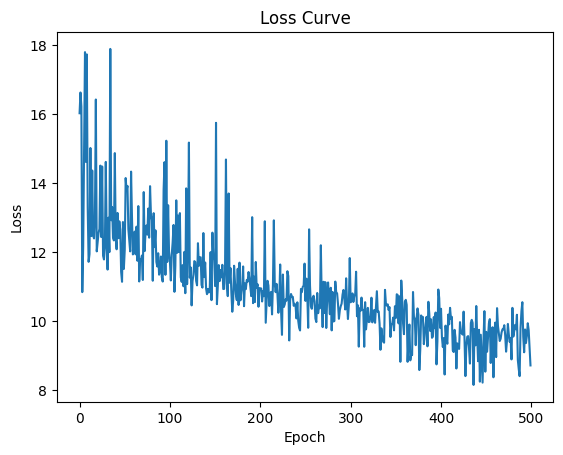

In [ ]:
model = SGDClassifier(loss='log', random_state=93)
losses = []
epochs = 500

for _ in range(epochs):

    model.partial_fit(x_train, y_train, [0, 1])
    loss = log_loss(y_train , model.predict_proba(x_train))
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

AUC: 0.71875


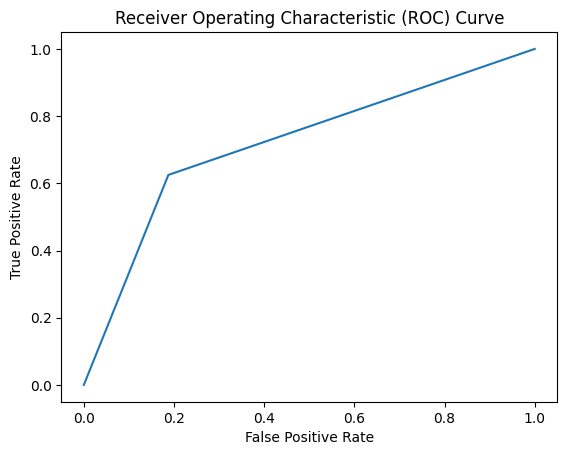

In [ ]:
# part 5
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_pred, y_test)
print("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_pred, y_test)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()